In [1]:
import tweepy as tw
from tweepy import OAuthHandler

#Define Keys
#Getting Authorization
consumer_key = "spSuq0PDWGi1AandJPas65AlS"
consumer_secret = "EsYzbAMR5CiB9eV8CCwMVU64vwGuBkOnwlm79jriZQ7shanUKv"
access_token = "3058122066-9H65v07om9wndbaRwng8ND4Dn6f2K6WRVwAeHr8"
access_token_secret = "YuVzLXz7cbOydhilH3iK1nqt0R4lKF07nhqhcZhLswnlt"

#creating the authentication object.
auth = OAuthHandler(consumer_key, consumer_secret)
#Setting your access token and secret.
auth.set_access_token(access_token, access_token_secret)
#Creating an API object while passing in auth information.
api = tw.API(auth)

#Define the search term while excluding retweets variables.
search_word = "COVID19"
search_excl = search_word + " -filter:retweets"

#Collect  tweets
#.Cursor () used to search the tweets containing the searched word "COVID19".
tweets = tw.Cursor(api.search,
                   q=search_excl,
                   lang="en").items(7)
#for each through all  tweets pulled.
[tweet.text for tweet in tweets]

['How does #covid19 remain undetected for over 100 days in NZ before community spread resurfaces?\n\nThere must be lots… https://t.co/5r0kru5znb',
 '#PACEofChange takes a research-led look at some of the key issues that #COVID19 is having on UK businesses.\n\nWhich… https://t.co/c971MQ9nz6',
 'No problem, I think this whole situation with covid19 and the amount of lies the Tories are telling is making a lot… https://t.co/7cbqN8cO04',
 '550,000 additional children are falling victim to #wasting each month as a result of #COVID19.\n\nMillions of lives a… https://t.co/Rexsko9W91',
 'Great to see targeted mental health support for the LGBT community in Birmingham during this stressful time. Have y… https://t.co/vwRLg5JtgQ',
 "Health diplomacy is making scores around the world and changing global health as we know it. Here's what you need t… https://t.co/Ahpq09VBN8",
 'More care home visits allowed after relaxations in Scotland https://t.co/Bl0NcmkJ36 #carehome #COVID19 #Scotland']

In [40]:
import pandas as pd

#accessing users that tweet about COVID 19 
tweets = tw.Cursor(api.search,
                   q=search_excl,
                   lang="en").items(8)
#collecting specific users information from the collected data.
user_info = [[tweet.user.screen_name, tweet.user.location, tweet.text, tweet.created_at]
             for tweet in tweets]
#Creating a dataframe.
tweet_dataset = pd.DataFrame(data=user_info,
                            columns=["user","Location","Text","Datetime"])
tweet_dataset

,user,Location,Text,Datetime
0,shakimiki,Firenze/Mexico City,"@BritishAlba @BBCNews A handful of immigrants,...",2020-08-11 13:23:10
1,Mr_shivam_01,"Patna, India",RIP sir 💐\nTested #COVID19 positive .\n2 episo...,2020-08-11 13:23:10
2,ChelsieKealey,Northern Ireland,New #COVID19 figures. No new deaths and 48 new...,2020-08-11 13:23:10
3,BAHgroup,"Fort Lauderdale, FL",Good Mprning America! May God Bless each and e...,2020-08-11 13:23:09
4,aallnet,Chicago,The Thurgood Marshall Law Library has created ...,2020-08-11 13:23:08
5,dalindg,Nebraska,A used mask is like used underwear! Wash them ...,2020-08-11 13:23:06
6,AshokT_17,"Bengaluru, Karnataka",It is now crucial than ever to have a dynamic ...,2020-08-11 13:23:05
7,21CenturyColony,Occupied Gilgit-Baltistan,Legendary Urdu Poet #RahatIndori breathed his ...,2020-08-11 13:23:05


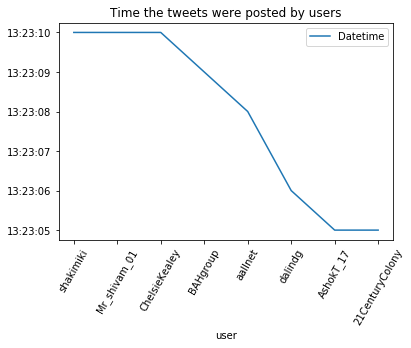

In [53]:
import matplotlib.pyplot as plt

#plot line graph for users vs timeframe their tweets were posted
tweet_dataset.plot.line(rot=60,x="user",y="Datetime",title="Time the tweets were posted by users")